## Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Описание данных

Данные для работы находятся в нескольких таблицах. 

market_file.csv

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

market_money.csv

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

market_time.csv

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

money.csv

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

## План работы

План работы следующий:
- Глава 4 загружаем данные и проверяем их на соответствие с описанием.
- Глава 5 занимаемся предобработкой данных. Смотрим пропуски, аномалии, опечатки в категорийных признаках и ищем дубликаты. Сводим данные в одну таблицу.
- В главе 6 проводим ислледовательский анализ. Смотрим распределение всех признаков ишем закономерности.
- Глава 7 проводим корреляционный анализ. Изкчаем корреляционную матрицу построееную несколькими методами.
- Глава 8 составляем пайплайн, который обучит и выберет наилучшую модель и ее гиперпараметры для предсказания целевого признака.
- В 9 главе проведем анализ значимости признаков используя параметры Шеппли.
- В 10 главе выберем один из сегментов пользователей и используя обученным модель составим рекомендации как в нем повысить покупательскую активность.
- В конце сформулируем общий вывод по работе.

## Загрузка данных

### Загрузка библиотек

In [1]:
!pip install phik -q
!pip install shap -q
!pip install scikit-learn==1.4.2 -q
!pip install matplotlib==3.5.3 -q


In [2]:
import shap
import numpy as np
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import os
from scipy.stats import shapiro


from sklearn.model_selection import train_test_split

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler
)   
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Константы

RANDOM_STATE = 42
TEST_SIZE = 0.25



### market_file.csv

Загружаем по очереди все данные проверяя их на корректность загрузки в датафреймы.

In [3]:
if os.path.exists('/datasets/market_file.csv'):
    df = pd.read_csv('/datasets/market_file.csv')
else:
    print('Something is wrong')

In [4]:
display(df.head(5))

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

### market_money.csv

In [6]:
if os.path.exists('/datasets/market_money.csv'):
    money = pd.read_csv('/datasets/market_money.csv')
else:
    print('Something is wrong')
display(money.head())

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [7]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


### market_time.csv

In [8]:
if os.path.exists('/datasets/market_time.csv'):
    time = pd.read_csv('/datasets/market_time.csv')
else:
    print('Something is wrong')
display(time.head(5))

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [9]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


### money.csv

In [10]:
if os.path.exists('/datasets/money.csv'):
    income = pd.read_csv('/datasets/money.csv',sep=';',decimal=',')
else:
    print('Something is wrong')
display(income.head(5))

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [11]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


### Вывод.

Данные соответствуют описанию и корректно загружены в датафреймы. Пропущенных значений нет. Основной датафрейм содержит информацию о числе пользователей:

In [12]:
initial_size = df.shape[0]
initial_size

1300

## Предобработка данных

### Категории

Посмотрим на предмет ошибок содержимое категорийных признаков во всех датафреймах.

In [13]:
df_cat_columns = ['Покупательская активность','Тип сервиса',\
                  'Разрешить сообщать','Популярная_категория' ]
for i in df_cat_columns:
    print(df[i].unique())

['Снизилась' 'Прежний уровень']
['премиум' 'стандартт' 'стандарт']
['да' 'нет']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


Исправляем опечатку.

In [14]:
df.loc[df['Тип сервиса']=='стандартт','Тип сервиса'] = 'стандарт'

In [15]:
money['Период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [16]:
time['Период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

Исправляем опечатку.

In [17]:
time.loc[time['Период']=='предыдцщий_месяц','Период']='предыдущий_месяц'

### Дубликаты.

Для начала проверим наличие полных дубликатов.

In [18]:
print(df.duplicated().sum(),money.duplicated().sum(),time.duplicated().sum(),income.duplicated().sum())

0 0 0 0


Их нет. Уникальность клиентов определяется по id. Тогда проверим нет ли разных клиентов с одинаковыми id.

In [19]:
print(df['id'].duplicated().sum(),money['id'].duplicated().sum(),\
      time['id'].duplicated().sum(),income['id'].duplicated().sum())

0 2600 1300 0


Дубликатов по id нет. Но есть не очень удобная структура данных в money и time где id повторяется 3 и 2 раза. Объединим все таблицы в одну и после этого проверим еще раз нет ли дублирующихся клиентов с разными id. 

### Обьединение таблиц.

Всего у нас 1300 id , в таблицах money и time , id дублируются для разных месяцов. Обьединим все в df так чтобы id был уникальным. И вся информация о пользователе содержалась в одной записи с уникальным id.

In [20]:
df2 = pd.DataFrame()
df1 = pd.DataFrame()
df0 = pd.DataFrame()
df2 = money.loc[money['Период']=='препредыдущий_месяц'].reset_index(drop=True)
df2 = df2.rename(columns={'Выручка':'Выручка2'}).drop('Период',axis=1).set_index('id')
df1 = money.loc[money['Период']=='предыдущий_месяц'].reset_index(drop=True)
df1 = df1.rename(columns={'Выручка':'Выручка1'}).drop('Период',axis=1).set_index('id')
df0 = money.loc[money['Период']=='текущий_месяц'].reset_index(drop=True)
df0 = df0.rename(columns={'Выручка':'Выручка0'}).drop('Период',axis=1).set_index('id')
df = df.set_index('id')

df3 = time.loc[time['Период']=='предыдущий_месяц'].reset_index(drop=True)
df3 = df3.rename(columns={'минут':'Минут1'}).drop('Период',axis=1).set_index('id')
df4 = time.loc[time['Период']=='текущий_месяц'].reset_index(drop=True)
df4 = df4.rename(columns={'минут':'Минут0'}).drop('Период',axis=1).set_index('id')

df = pd.merge(df, df0, left_index=True, right_index=True)
df = pd.merge(df, df1, left_index=True, right_index=True)
df = pd.merge(df, df2, left_index=True, right_index=True)
df = pd.merge(df, df3, left_index=True, right_index=True)
df = pd.merge(df, df4, left_index=True, right_index=True)

income = income.set_index('id')
df = pd.merge(df, income, left_index=True, right_index=True)

df.head()

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка0,Выручка1,Выручка2,Минут1,Минут0,Прибыль
id,,,,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,3293.1,0.0,0.0,13,14,0.98
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0,12,10,4.16
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058.4,5457.5,4826.0,8,13,3.13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0,11,13,4.87
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0,8,11,4.21


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Покупательская активность            1300 non-null   object 
 1   Тип сервиса                          1300 non-null   object 
 2   Разрешить сообщать                   1300 non-null   object 
 3   Маркет_актив_6_мес                   1300 non-null   float64
 4   Маркет_актив_тек_мес                 1300 non-null   int64  
 5   Длительность                         1300 non-null   int64  
 6   Акционные_покупки                    1300 non-null   float64
 7   Популярная_категория                 1300 non-null   object 
 8   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 9   Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 10  Ошибка_сервиса                       1300 non-null   int64  
 11  Страниц_за_визит       

Получили 1300 строк кажая соответствует одному клиенту.

Проверим что и теперь нет дубликатов.

In [22]:
print(df.duplicated().sum())

0


### Аномалии

Изучим информацию о датафрейме.

In [23]:
df.describe()

,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка0,Выручка1,Выручка2,Минут1,Минут0,Прибыль
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923,5314.960846,4936.920385,4825.206923,13.467692,13.204615,3.996631
std,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126,2939.708156,739.597997,405.979663,3.932029,4.220589,1.013722
min,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000,2758.700000,0.000000,0.000000,5.000000,4.000000,0.860000
25%,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000,4706.050000,4496.750000,4583.000000,11.000000,10.000000,3.300000
50%,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000,5179.950000,5005.000000,4809.000000,13.000000,13.000000,4.045000
75%,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000,5761.725000,5405.625000,5053.500000,17.000000,16.000000,4.670000
max,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000,106862.200000,6869.500000,5663.000000,23.000000,23.000000,7.430000


Видно аномально большое значение и аномально маленькое в выручке.

In [24]:
df.loc[(df['Выручка0']>10000)|(df['Выручка1']<1000)|(df['Выручка2']<1000)]

,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка0,Выручка1,Выручка2,Минут1,Минут0,Прибыль
id,,,,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,3293.1,0.0,0.0,13,14,0.98
215357,Снизилась,стандарт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5,5986.3,0.0,0.0,12,6,4.66
215359,Снизилась,стандарт,да,4.6,5,110,0.00,Домашний текстиль,4,2,4,2,4735.0,0.0,0.0,13,11,5.08
215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7,106862.2,6077.0,5051.0,12,14,3.88


3 пользователя содержат выручку только за текущий месяц. Возможно это ошибка. Но возможно это просто новые пользователи, которые случайно попали в список постоянных покупателей.  К выручке 4го пользователя вероятно добавили 10 в начале, но уверенности нет в этом. По этому эти 4 записи удалим, на величину датафрейма это не сильно повлияет.

In [25]:
df = df.loc[(df['Выручка0']<10000)&(df['Выручка1']>0)&(df['Выручка2']>0)]
df.shape[0]/initial_size

0.9969230769230769

### Вывод

Мы обьединили все таблицы в одну. Теперь вся доступная информация про пользователя находится в одной строке с id. Дубликатов нет. Пропушенных значений нет. Аномалий нет. Переходим к анализу данных.  

## Исследовательский анализ данных

Создадим переменные для дискретных и неприрывных численных столбцов и для категорийных столбцов.
Длительность для удобства переведем в неприрывные столбцы.

### Численные признаки

In [26]:
df['Длительность'] = df['Длительность'].astype(float)
con = df.select_dtypes(include=['float']).columns.tolist()
con

['Маркет_актив_6_мес',
 'Длительность',
 'Акционные_покупки',
 'Выручка0',
 'Выручка1',
 'Выручка2',
 'Прибыль']

In [27]:
dis = df.select_dtypes(include=['int']).columns.tolist()
dis

['Маркет_актив_тек_мес',
 'Средний_просмотр_категорий_за_визит',
 'Неоплаченные_продукты_штук_квартал',
 'Ошибка_сервиса',
 'Страниц_за_визит',
 'Минут1',
 'Минут0']

In [28]:
cat = df.select_dtypes(exclude=['int','float']).columns.tolist()
cat

['Покупательская активность',
 'Тип сервиса',
 'Разрешить сообщать',
 'Популярная_категория']

Нарисуем и изучим гистограммы численных столбцов.

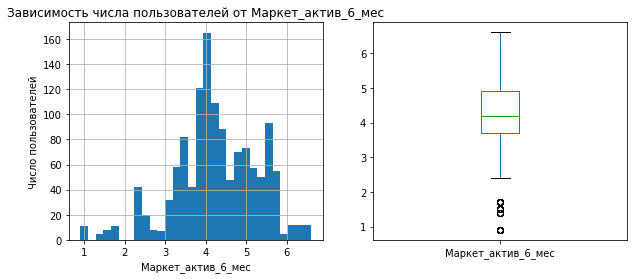

p=3.78e-13 Вероятно не нормальное


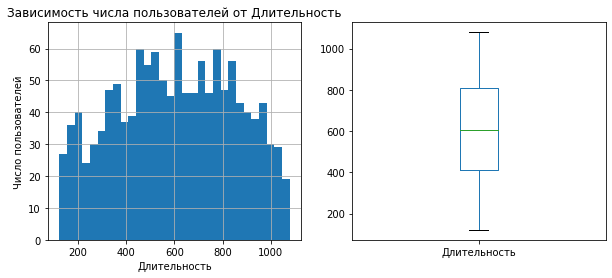

p=5.74e-15 Вероятно не нормальное


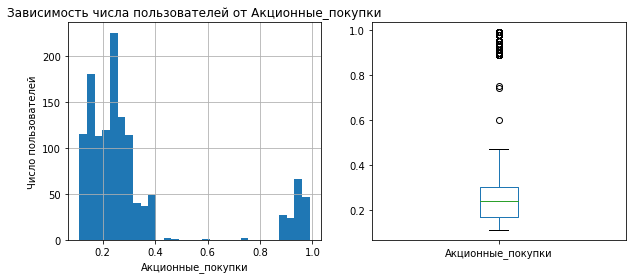

p=4.2e-45 Вероятно не нормальное


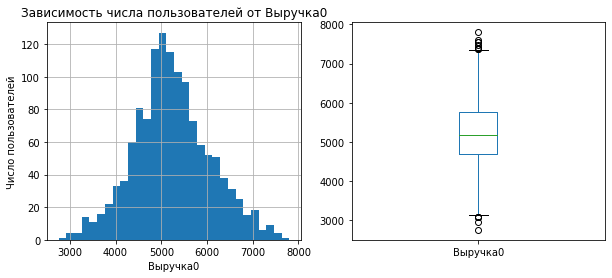

p=0.000153 Вероятно не нормальное


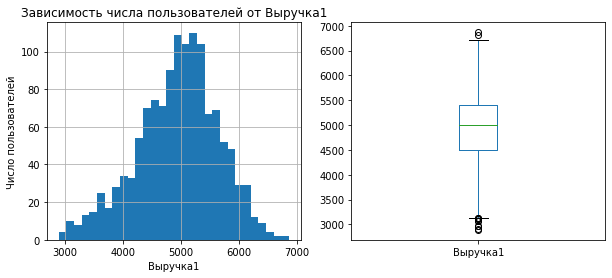

p=1.31e-07 Вероятно не нормальное


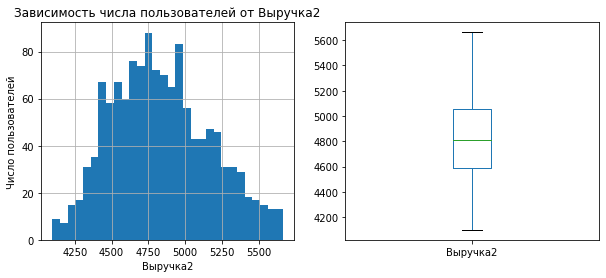

p=1.16e-09 Вероятно не нормальное


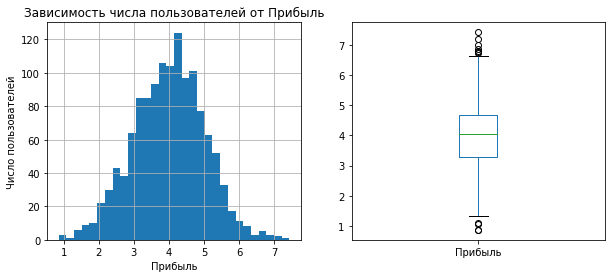

p=0.345 Вероятно нормальное


In [29]:
for i in con:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[i].hist(bins=30)
    plt.title(f'Зависимость числа пользователей от {i}')
    plt.xlabel(i)
    plt.ylabel('Число пользователей')
    
    plt.subplot(1,2,2)
    df[i].plot(kind='box')
    plt.title('')
    plt.ylabel('')
    
    
    plt.show()
    
    stat, p = shapiro(df[i])
    if p>0.05:
        print(f'p={p:.3} Вероятно нормальное')
    else :
        print(f'p={p:.3} Вероятно не нормальное')

    

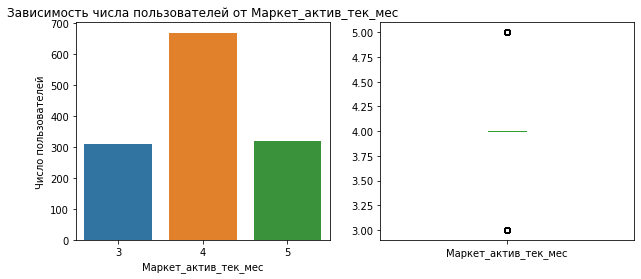

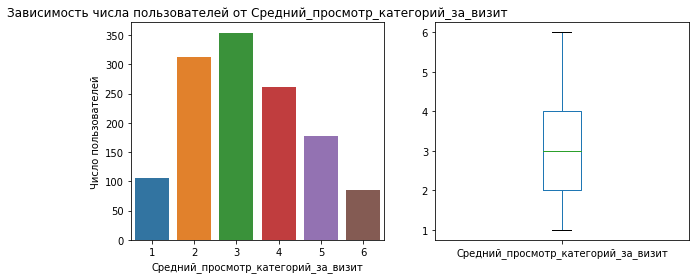

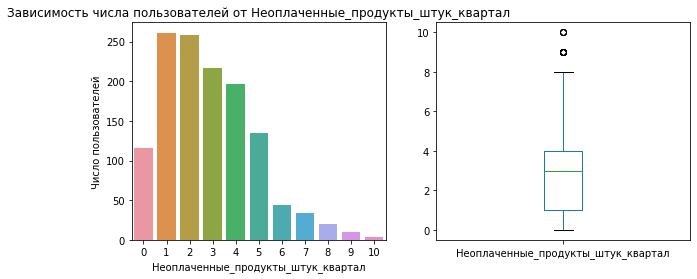

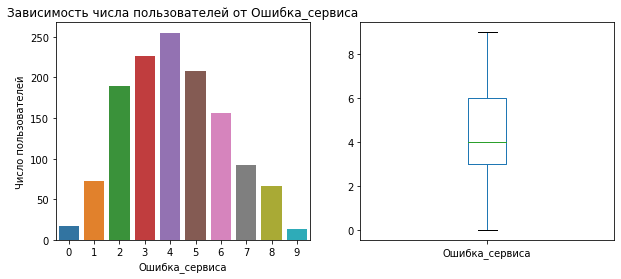

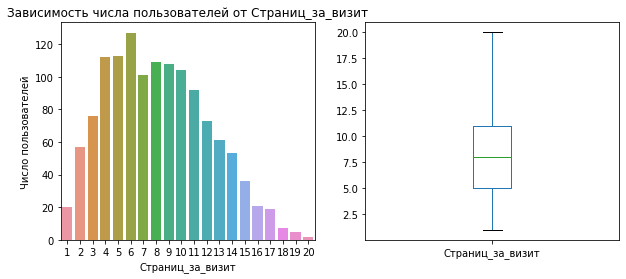

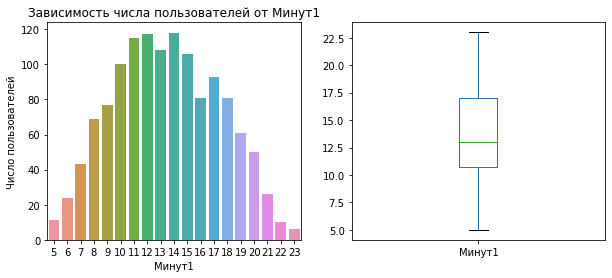

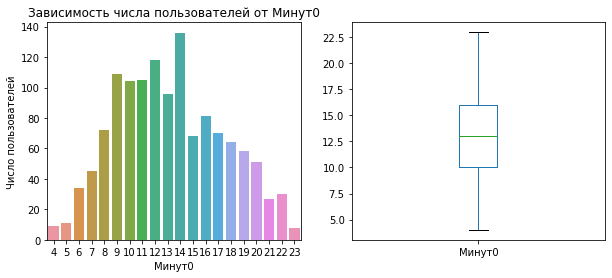

In [30]:
for i in dis:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.countplot(data=df,x=i)
    plt.title(f'Зависимость числа пользователей от {i}')
    plt.xlabel(i)
    plt.ylabel('Число пользователей')
    
    plt.subplot(1,2,2)
    df[i].plot(kind='box')
    plt.title('')
    plt.ylabel('')
    
    
    plt.show()

Распределения почти всех численных значений имеют правильную колоколообразную форму. Значительных выбросов нет. Исключением является только доля акционных покупок, где можно выделить 2 класса пользователей 'обычные' и 'любители акций'.

### Категорийные признаки

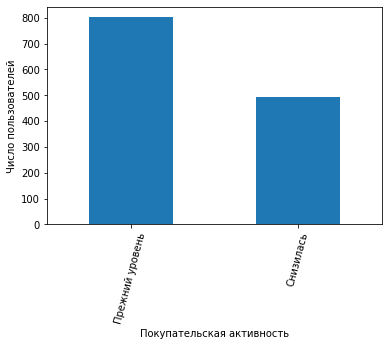

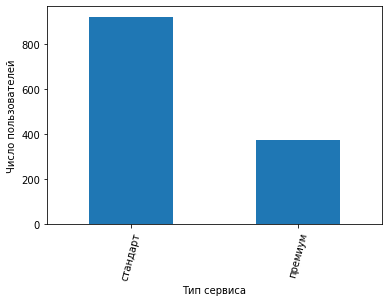

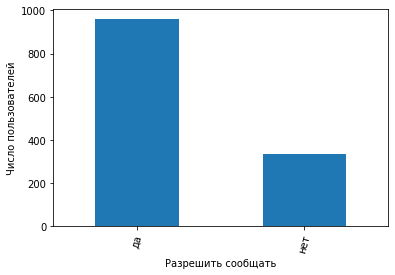

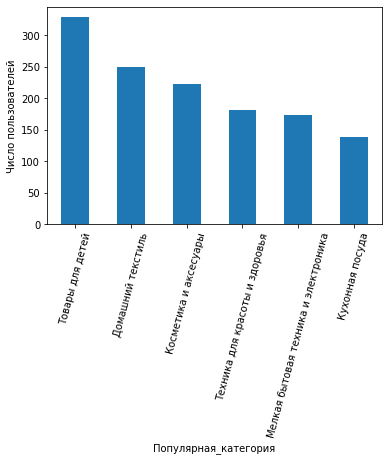

In [31]:
for i in cat:
    df.pivot_table(index=i,values='Выручка0',aggfunc='count')\
    .sort_values(by='Выручка0',ascending=False)\
    .plot(kind='bar',rot='75',legend=False)
    plt.xlabel(i)
    plt.ylabel('Число пользователей')
    plt.show()

Видно, что активность действительно снижается. Есть небольшой дисбаланс классов в целевом признаке Покупательская активность. Делая разделение на выборки используем стратификацию.

## Корреляционный анализ

Поскольку распределение признаков не является нормальным, для поиска корреляций будем использовать кореляции Спирмана и $\phi_k$.

### Корреляция Спирмена

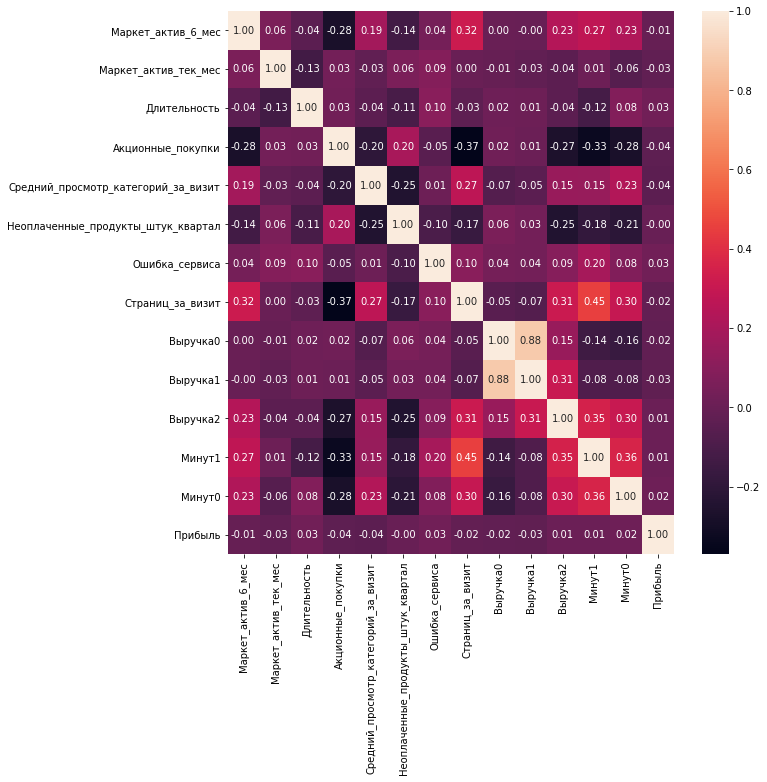

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='spearman'),annot=True, fmt='.2f')
plt.show()

### Корреляция  $\phi_k$

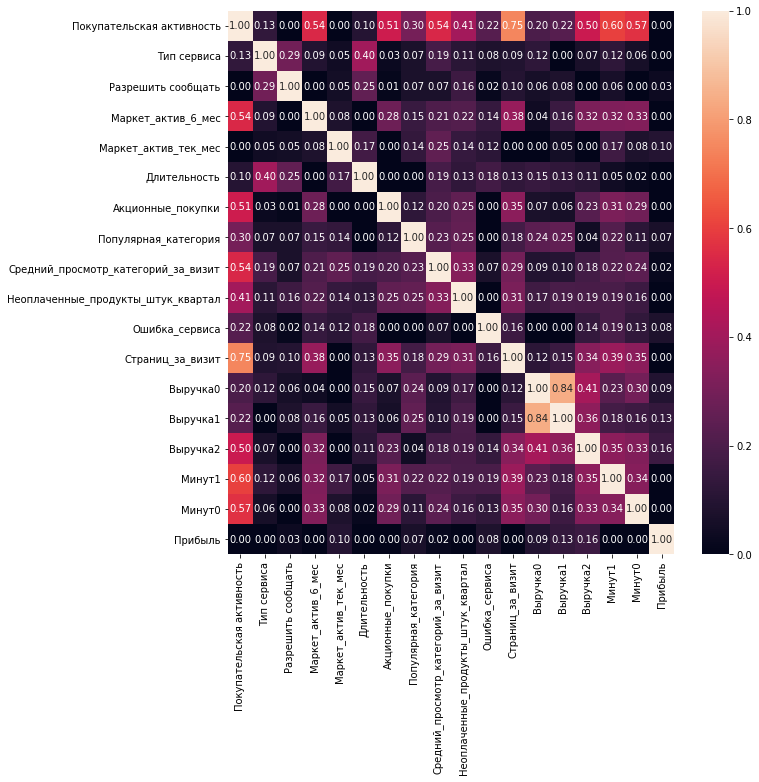

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.phik_matrix(interval_cols=con),annot=True, fmt='.2f')
plt.show()

Посмотрим на взаимосвязи пораметров внутри каждого класса.

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable Покупательская активность for analysis 1. Dropping this column
  warnings.warn(


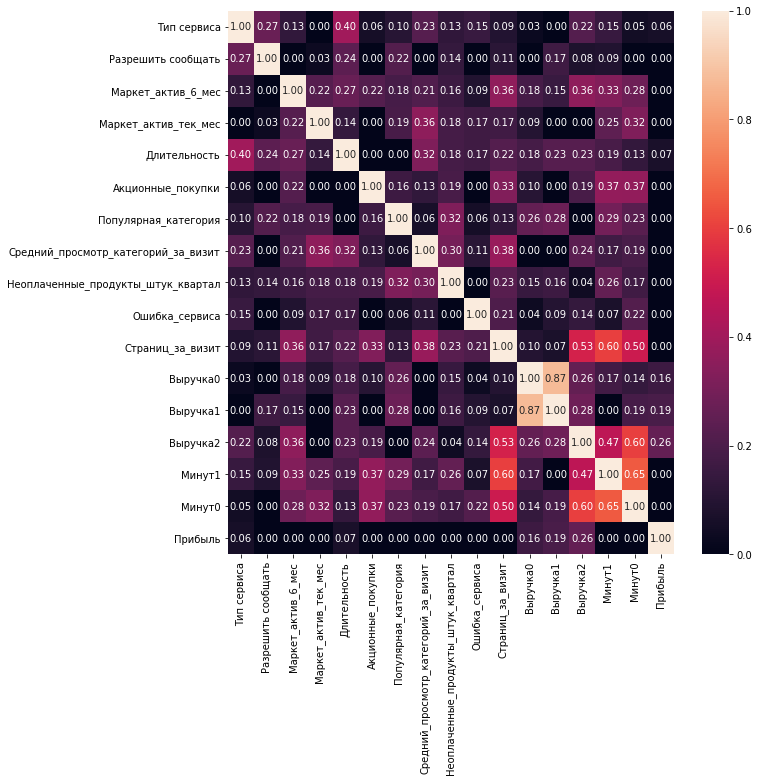

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df.loc[df['Покупательская активность']=='Снизилась'].phik_matrix(interval_cols=con),annot=True, fmt='.2f')
plt.show()

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable Покупательская активность for analysis 1. Dropping this column
  warnings.warn(


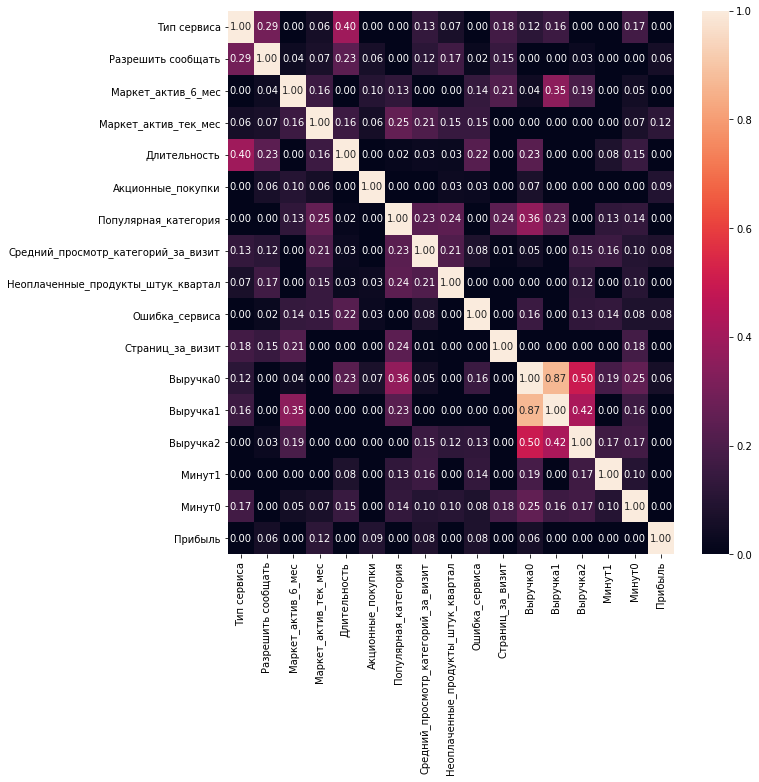

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.loc[df['Покупательская активность']=='Прежний уровень'].phik_matrix(interval_cols=con),annot=True, fmt='.2f')
plt.show()

Можно заметить что внутри класса Покупательская активность Снизилась признаки более скоррелированы.

### Вывод

Видно, что целевой признак, который мы хотим предсказывать - Покупательская активность имееет корреляцию со многими признаками. Явления мультиколлинеарности тут не наблюдается, хотя корреляция выручки за предыдущий месяц и текущий довольно высоки.

## Использование пайплайнов

В этой главе мы будем решать задачу классификации с целевым признаком 'Покупательская активность'. 

### Пайплайн

Создадим пайплайн который выберет лучшую комбинацию модели (и ее гипермараметров) , кодировщика и скейлера.

Разбиваем выборку на тестовую и тренировочную.

In [37]:
# Создадим явно списки численных и категорийных величин. 
num = ['Маркет_актив_6_мес','Маркет_актив_тек_мес',
 'Длительность','Акционные_покупки','Средний_просмотр_категорий_за_визит',
 'Неоплаченные_продукты_штук_квартал','Ошибка_сервиса','Страниц_за_визит',
 'Выручка0','Выручка1','Выручка2','Минут1','Минут0']
cat = ['Популярная_категория']
orc = ['Тип сервиса','Разрешить сообщать']

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Прибыль','Покупательская активность'], axis=1),
    df['Покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df['Покупательская активность'])

X_train.shape, X_test.shape


((972, 16), (324, 16))

Для кодировки категорийных признаков будем использовать OneHotEncoder, OrdinalEncoder. Для масштабирования количественных StandardScaler, MinMaxScaler, RobustScaler. 
Для обучения используем модели KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и  SVC.

Метрику будем использовать ROC-AUC т.к. присутствует дисбаланс классов и важно минимизировать как FP так и FN.

In [38]:
# создаём пайплайн для подготовки признаков из списка cat: OHE-кодирование
ohe_pipe = Pipeline(
    [
        (
            'ohe', 
            OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output=False)
        )
    ]
)

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'], 
                    ['нет', 'да'],
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, cat),
        ('ord', ord_pipe, orc),
        ('num', RobustScaler(), num)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

In [39]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 9),
        'models__min_samples_leaf': range(2 , 5),
        'models__min_samples_split': range(2 , 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough'] 
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,100),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C':range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__kernel':['rbf','linear','sigmoid'],
        'models__degree':range(1,6),
        'models__C':range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']  

    },
]

In [40]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    n_iter=200,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели при кросс-валидации выборке:', randomized_search.best_score_)

KeyboardInterrupt: 

Посмотрим метрику на тестовой выборке.

In [ ]:
y_test_pred_proba = randomized_search.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred_proba)}')

### ROC-AUC

Нарисуем для наглядности кривую ROC-AUC.

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_proba, pos_label='Снизилась')

plt.plot(fpr, tpr)
plt.title("График зависимости FPR от TPR")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

При пороговом значении 0.5 матрица ошибок имеет следующий вид.

In [ ]:
y_test_pred = randomized_search.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

### Вывод

Мы отобрали лучшую модель ей оказалась KNeighborsClassifier с числом ближайших соседей 31. OneHotEncoder для категорийных признаков и RobustScaler для численных. Метрика ROC-AUC на тестовой выборке: 0.92. 

In [ ]:
randomized_search.best_estimator_

## Анализ важности признаков

Посчитаем значения Шепли для признаков в лучшей модели выбранной выше. 

In [ ]:
X_train_p = pd.DataFrame(
    data_preprocessor.fit_transform(X_train),
    columns=data_preprocessor.get_feature_names_out()
)

X_test_p = pd.DataFrame(
    data_preprocessor.transform(X_test),
    columns=data_preprocessor.get_feature_names_out()    
)

#y_train_p = y_train.reset_index(drop=True)
#y_test_p = y_test.reset_index(drop=True)


best_model = KNeighborsClassifier(n_neighbors=31)
best_model.fit(X_train_p,y_train)


explainer = shap.Explainer(best_model.predict_proba, X_test_p,\
                           output_names=data_preprocessor.get_feature_names_out())
shap_values = explainer(X_test_p)

In [ ]:
shap.plots.bar(shap_values[:,:,1], max_display=21) 

In [ ]:
shap.plots.beeswarm(shap_values[:,:,1], max_display=21)

### Выводы

Исходя из хначений Шепли сновными признаками для определения покупальской активности являются:
- Акционные покупки. Клиенты которые покупают в основном по акциям склонны снижать активность. 
- Число страниц за визит. 
- Минут в текушем месяце
- Минут в прошедшем месяце
- Число категорий за визит
Эти 4 категории взаимосвязаны. Кто меньше пользуется сайтом тот склонен снижать активность.  
- Маркетинговая активность за пол года. Клиенты лучше охваченые маркетинговой активностью меньше склоны снижать свою активность
- Выручка 2 месяца назад. Кто много тратит - меньше имеет склонность снижать активность
- Неоплаченные продукты . Чем больше неоплаченых продуктов, тем больше склонность снижать активность.
- Ошибки сервиса. С ошибками ситуация на первый взгляд парадоксальная: больше ошибок - больше активность. Но ошибки возникают в процессе пользования сайтом, кто много пользуется (т.е. высокая активность.) у того и много ошибок. 
Вклад остальных признаков мал.

При моделирования эти наблюдения можно использовать при выборе признаков для обучения.
- Категории продуктов можно не учитывать. 
- Выручку (0,1,2) возможно стоит обьединить. т.к. меду ними есть корреляция. вклады 0 и 1 близки , но противоположны с 2 , что несколько не логично. 
- Маркетинговую активность смотреть только за 6 месяцев.
- От ошибок сервиса перейти к отношению ошибок ко времени. Или близкой по смыслу комбинации.
- Вместо раздельных параметров активности на сайте перейти к какойт-то их комбинации.

При принятии бизнес-решений нужно ориентироваться на самые значимые признаки.
Например не ждать быстрый отклик на маркетинговые компании, т.к. значимый признак это среднее количество за пол года ,а не за текущий месяц.

## Сегментация покупателей

Выберем сегмент клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности. т.е. клиенты с долей покупок по акциям >0.8 и снижающимся уровнем активности.

In [ ]:
seg = df.loc[(df['Покупательская активность']=='Снизилась')&(df['Акционные_покупки']>0.8)]
seg.shape

Таких клиентов 131 или 10% от общего количества.

In [ ]:
seg.shape[0]/initial_size

Посмотрим прибыль с таких клиентов относительно остальных.

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
seg['Прибыль'].hist(bins=30)
plt.title(f'Зависимость числа пользователей от прибыли')
plt.xlabel('Прибыль')
plt.ylabel('Число пользователей')
    
plt.subplot(1,2,2)
seg['Прибыль'].plot(kind='box')
plt.title('')
plt.ylabel('')
    
    
plt.show()


In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df.loc[~df.index.isin(seg.index),'Прибыль'].hist(bins=30)
plt.title(f'Зависимость числа пользователей от прибыли')
plt.xlabel('Прибыль')
plt.ylabel('Число пользователей')
    
plt.subplot(1,2,2)
df.loc[~df.index.isin(seg.index),'Прибыль'].plot(kind='box')
plt.title('')
plt.ylabel('')
    
    
plt.show()

Таким образом видно, что с точки зрения прибыли, клиенты с высокой долей акционных покупок примерно равны всем остальным.

Выберем семпл из 5 пользователей в этом сегменте и посмотрим индивидуальные значения Шапли

In [ ]:
sample = seg.loc[seg.index.isin(y_test.reset_index()['id'])].sample (n= 5)
sample.index = y_test.reset_index().loc[y_test.reset_index()['id'].isin(sample.index)].index
for i in sample.index:
    shap.plots.waterfall(shap_values[i,:,1],max_display=21)

Везде доминирует доля акционных покупок.

Теперь посмотрим осиное гнездо и важность признаков для всего сегмента.

In [ ]:
seg = seg.loc[seg.index.isin(y_test.reset_index()['id'])]
mask = y_test.reset_index().loc[y_test.reset_index()['id'].isin(seg.index)]
mask = mask.reset_index()['index'].to_list()
shap.plots.beeswarm(shap_values[mask,:,1], max_display=21)

In [ ]:
shap.plots.bar(shap_values[mask,:,1], max_display=21) 

### Вывод

Был выделен сегмент пользователей с высокой долей акционных покупок и высокой вероятностью снижения активности и изучено ,используя значения Шепли, внияние признаков на этот сегмент . Для того чтобы поддержать их покупательскю активность нужно воздействовать на самые важные признаки.
- Предлагать персональные акции на группу таваров которая чаще всего посещалась.
- При этом давать выбор на какие товары поставить акцию. Это увеличмт число страниц за визит, время на сайте.
- Так же можно поднимть количество маркетинговых коммуникаций.
- Предлагать рассрочку для снижения доли неоплаченых продуктов.

## Общий вывод

Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
Цель исследования построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца и позволит предсказать каким клиентам нужно предоставить персонализированных предложений.

Исходные данные были загружены и проверены на корректность. Затем была проведена предобработка, в ходе которой были исправлены опечатки в категорийных признаках, были удалены 4 ошибоные записи. Дубликатов и пропущенных значений данные не содержали. Затем данные из всех 4 таблиц были сведены в одну таблицу для удобства дальнейшей работы.

В ходе исследовательского анализа были изучены распределения всех признаков. Большинство численных признаков имели распределение близкое к нормальному. Исключением было паспределение клиентов по доле акционных покупок. По этому признаку четко выделялись 2 кластера покупателей с низкой и высокой долей акционных покупок. В целевом признаке был выявлен дисбаланс, клиентов со снижающейся активностью в несколько раз меньше чем не снижающейся.

Затем проведя корреляционный анализ по методам Пирсона, Спирмена и $\phi_k$, убедились в том что целевой признак действительно связан с остальными и что данные не содержат мультиколлинеарности.

После этого прешли к составлению модели для этого создан пайплайн, который используя кросвалидацию с метрикой ROC-AUC позволил выбрать оптимальную модель с гиперпараметрами, энкодер и скейлинг.
Оптимальной моделью оказалась KNeighborsClassifier c n=31 и OneHotEncoder и RobustScaler. При этом метрика ROC-AUC на тестовой выборке: 0.92.

Среди клиентов явным образом выделяется сегмент (~10% от всех клиентов) с высокой долей акционных покупок и высокой вероятностью к снижению активности. При этом средний доход с клиента в этом сегменте такой же как и у клиентов с низкой долей акционных покупок.
Для поддержки покупательской активности рекомендуется увеличить  число маркетинговых коммуникаций с предоставлением выбора на что установить акцию. Это с одной стороны удовлетворит интерес этого сегмента к акциям и с другой поднимет число просмотров и время проведенное на сайте , что , как видно из модели, положительно сказывается на покупательской активности.